In [1]:
from sympy import *
x = Symbol('x')
f = 2*x**2+3
f_prime = f.diff(x)

In [2]:
print(f)
print(f_prime)

2*x**2 + 3
4*x


In [4]:
f = lambdify(x, f)
f_prime = lambdify(x, f_prime)

In [7]:
print(f(4))
print(f_prime(3))

35
12


In [9]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 2s 0us/step


(14, 14)


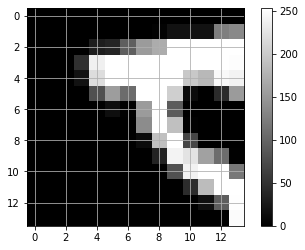

In [31]:
testImage = X_train[0][4:-10,4:-10]
print(testImage.shape)
plt.imshow(testImage, cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.grid(True)

In [33]:
print(testImage)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   3  18  18  18 126 136]
 [  0   0   0   0  30  36  94 154 170 253 253 253 253 253]
 [  0   0   0  49 238 253 253 253 253 253 253 253 253 251]
 [  0   0   0  18 219 253 253 253 253 253 198 182 247 241]
 [  0   0   0   0  80 156 107 253 253 205  11   0  43 154]
 [  0   0   0   0   0  14   1 154 253  90   0   0   0   0]
 [  0   0   0   0   0   0   0 139 253 190   2   0   0   0]
 [  0   0   0   0   0   0   0  11 190 253  70   0   0   0]
 [  0   0   0   0   0   0   0   0  35 241 225 160 108   1]
 [  0   0   0   0   0   0   0   0   0  81 240 253 253 119]
 [  0   0   0   0   0   0   0   0   0   0  45 186 253 253]
 [  0   0   0   0   0   0   0   0   0   0   0  16  93 252]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 249]]


[  0   0   0   0  30  36  94 154 170 253 253 253 253 253]


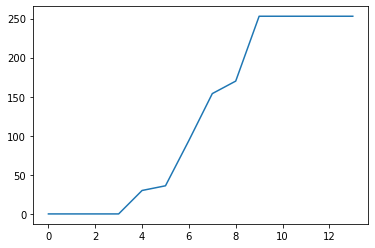

In [41]:
plt.plot(testImage[2]) #f([0.1.2...13]) = [testImage[2]]
print(testImage[2])
print(36-0) #f(x+1, y) - f(x-1,y) => x=4

In [34]:
import numpy as np
import scipy
import scipy.signal as sig
kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

In [35]:
G_x = sig.convolve2d(testImage, kernel_x, mode='same') 
G_y = sig.convolve2d(testImage, kernel_y, mode='same') 


In [42]:
print(G_x)

[[   0    0    0    0    0    0    0   -3  -18  -15    0 -108 -118  126]
 [   0    0    0  -30  -36  -64 -118  -82 -135 -113    0 -216 -236  505]
 [   0    0  -49 -298 -276 -143 -236 -155 -216 -181    0 -108 -116  885]
 [   0    0 -116 -725 -679 -128 -118  -76  -99  -28   71  -49  -55 1006]
 [   0    0  -85 -756 -830 -110  -97 -146   48  352  347 -130 -270  790]
 [   0    0  -18 -379 -561  -89 -334 -544  160  792  571 -113 -367  333]
 [   0    0    0  -80 -184  -29 -516 -903  125  999  575  -30 -154   43]
 [   0    0    0    0  -14   -1 -429 -948 -280  875  723   74    0    0]
 [   0    0    0    0    0    0 -161 -668 -776  301  777  259  159  108]
 [   0    0    0    0    0    0  -11 -260 -805 -500  243  291  452  469]
 [   0    0    0    0    0    0    0  -35 -403 -715 -449 -117  360  867]
 [   0    0    0    0    0    0    0    0  -81 -330 -560 -522 -236  852]
 [   0    0    0    0    0    0    0    0    0  -45 -218 -394 -788  439]
 [   0    0    0    0    0    0    0    0    0    0

In [38]:
print(G_y)

[[   0    0    0    0    0    0    0    3   24   57   72  180  406  398]
 [   0    0    0   30   96  196  378  572  747  929 1012 1012 1012  759]
 [   0    0   49  336  778  997 1012 1009  988  955  940  832  604  357]
 [   0    0   18  225  613  782  634  440  265   28 -181 -203  -95  -30]
 [   0    0  -49 -256 -462 -498 -389 -146  -48 -338 -785 -958 -770 -404]
 [   0    0  -18 -255 -695 -949 -842 -450 -262 -524 -741 -809 -917 -729]
 [   0    0    0  -80 -316 -499 -484 -335 -129  -39  -33  -52 -240 -351]
 [   0    0    0    0  -14  -29 -159 -350 -106  333  303   70    0    0]
 [   0    0    0    0    0    0 -139 -496 -524  107  657  651  377  110]
 [   0    0    0    0    0    0  -11 -212 -563 -364  421  929  878  491]
 [   0    0    0    0    0    0    0  -35 -311 -697 -575   17  568  649]
 [   0    0    0    0    0    0    0    0  -81 -402 -798 -874 -424  106]
 [   0    0    0    0    0    0    0    0    0  -45 -276 -670 -696 -261]
 [   0    0    0    0    0    0    0    0    0    0

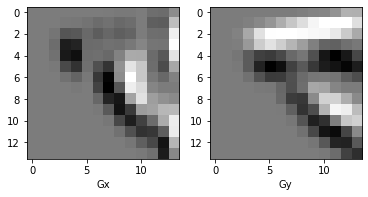

In [36]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow((G_x + 255) / 2, cmap='gray'); ax1.set_xlabel("Gx")
ax2.imshow((G_y + 255) / 2, cmap='gray'); ax2.set_xlabel("Gy")
plt.show()

<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>

<h1>What is Colaboratory?</h1>

Colaboratory, or "Colab" for short, allows you to write and execute Python in your browser, with 
- Zero configuration required
- Free access to GPUs
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

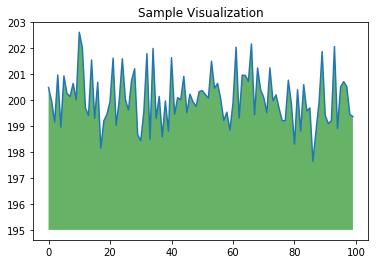

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
